In [1]:
import os, sys, random

THIS_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(PARENT_DIR)

import numpy as np
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

font = {
        'size'   : 26}

matplotlib.rc('font', **font)


In [2]:
path = './../Results/LV/'


In [3]:
# time = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['t']
# i =2
# fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
# ax[0].plot(time.reshape(-1, 1), ground_truth_sol[1, :, i].reshape(-1, 1) - quad_sol[1, :, i].reshape(-1, 1),)
# ax[0].plot(time.reshape(-1, 1), ground_truth_sol[0, :, i].reshape(-1, 1) - quad_sol[0, :, i].reshape(-1, 1),)

# ax[1].plot(time.reshape(-1, 1), ground_truth_sol[1, :, i].reshape(-1, 1) - cubic_sol[1, :, i].reshape(-1, 1),)
# ax[1].plot(time.reshape(-1, 1), ground_truth_sol[0, :, i].reshape(-1, 1) - cubic_sol[0, :, i].reshape(-1, 1),)

# fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
# ax[0].plot(ground_truth_sol[1, :, i].reshape(-1, 1),  ground_truth_sol[0, :, i].reshape(-1, 1))
# ax[0].plot(quad_sol[1, :, i].reshape(-1, 1),  quad_sol[0, :, i].reshape(-1, 1))

# ax[1].plot(ground_truth_sol[1, :, i].reshape(-1, 1),  ground_truth_sol[0, :, i].reshape(-1, 1))
# ax[1].plot(cubic_sol[1, :, i].reshape(-1, 1),  cubic_sol[0, :, i].reshape(-1, 1))




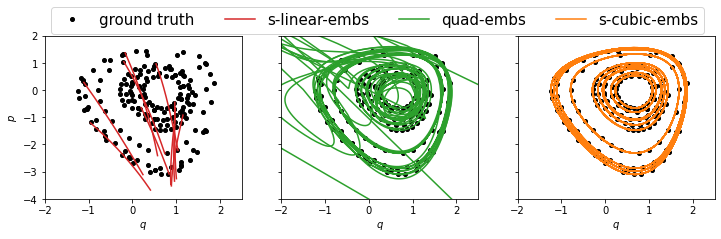

In [4]:
font = {'size'   : 18}

matplotlib.rc('font', **font)

prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

ground_truth_sol = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['ground_truth_sol']
linear_sol = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['learned_sol']
quad_sol = loadmat(path + 'quad/' + 'sol_trajectories.mat' )['learned_sol']
cubic_sol = loadmat(path + 'cubic/' + 'sol_trajectories.mat' )['learned_sol']

MARKERSIZE = 50

fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
for i in range(0, 1):
    ax[0].plot(
        ground_truth_sol[0, :, i].reshape(-1, 1),
        ground_truth_sol[1, :, i].reshape(-1, 1),
        "o",
        markersize=4,
        markevery=MARKERSIZE,
        color="k",
        label="ground truth",
    )
for j in range(3):
    for i in range(1, 10):
        ax[j].plot(
            ground_truth_sol[0, :, i].reshape(-1, 1),
            ground_truth_sol[1, :, i].reshape(-1, 1),
            "o",
            markersize=4,
            markevery=MARKERSIZE,
            color="k",
        )
    
for i in range(0, 1):
    ax[0].plot(
        linear_sol[0, :, i].reshape(-1, 1),
        linear_sol[1, :, i].reshape(-1, 1),
        color=colors[3],
        label='s-linear-embs',
    )
    
    ax[1].plot(
        quad_sol[0, :, i].reshape(-1, 1),
        quad_sol[1, :, i].reshape(-1, 1),
        color=colors[2],
        label='quad-embs',
    )
    
    ax[2].plot(
        cubic_sol[0, :, i].reshape(-1, 1),
        cubic_sol[1, :, i].reshape(-1, 1),
        color=colors[1],
        label='s-cubic-embs',
    )
    
for i in range(1, 10):
    ax[0].plot(
        linear_sol[0, :, i].reshape(-1, 1),
        linear_sol[1, :, i].reshape(-1, 1),
        color=colors[3],
    )
    
    ax[1].plot(
        quad_sol[0, :, i].reshape(-1, 1),
        quad_sol[1, :, i].reshape(-1, 1),
        color=colors[2],
    )
    
    ax[2].plot(
        cubic_sol[0, :, i].reshape(-1, 1),
        cubic_sol[1, :, i].reshape(-1, 1),
        color=colors[1],
    )
    
    plt.ylim(-4,2)
    ax[0].set_xlim(-2.0,2.5)
    ax[1].set_xlim(-2.0,2.5)
    ax[2].set_xlim(-2.0,2.5)

    ax[0].set(ylabel = '$p$', xlabel = '$q$')
    
    ax[1].set( xlabel = '$q$')
    ax[2].set( xlabel = '$q$')
    
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,loc = "upper center", ncol = 4, fontsize=15, bbox_to_anchor=(0.51, 1.05))

plt.savefig(path + f'phase_plot.png', dpi=300, transparent=False,  bbox_inches="tight", pad_inches=.2)
plt.savefig(path + f'phase_plot.pdf', transparent=False, bbox_inches="tight", pad_inches=.2)

In [5]:
Err_linear = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['err'][:]
Err_quad   = loadmat(path + 'quad/' + 'sol_trajectories.mat' )['err'][:]
Err_cubic  = loadmat(path + 'cubic/' + 'sol_trajectories.mat' )['err'][:]

In [6]:
Err_linear.shape

(25, 2, 1000)

In [7]:
err_linear = [(np.sqrt((e**2).sum())) for e in Err_linear]
err_quad   = [(np.sqrt((e**2).sum())) for e in Err_quad]
err_cubic  = [(np.sqrt((e**2).sum())) for e in Err_cubic]

# fun = lambda x: np.log10(np.sqrt(np.sum(x**2)/len(x.T)))
fun = lambda x: np.log10(np.sqrt(np.sum(x**2))/len(x.T))
fun = lambda x: np.mean(x**2)


err_linear = [fun(e) for e in Err_linear]
err_quad   = [fun(e) for e in Err_quad]
err_cubic  = [fun(e) for e in Err_cubic]

In [8]:
np.argmax(err_cubic), np.argmin(err_cubic),err_cubic

(5,
 14,
 [0.4686861297005391,
  0.04568386719713782,
  0.34967018829600205,
  0.6245582762734094,
  0.45031337873555594,
  0.9286474746486392,
  0.4713609619293713,
  0.37979426921403553,
  0.7434822082193921,
  0.2880100142914066,
  0.4044490272314754,
  0.33316961400928263,
  0.3047345974377483,
  0.8730951105066653,
  0.00995743999473833,
  0.41318026943295943,
  0.15315212050400379,
  0.2223225187023897,
  0.14941411702064586,
  0.3558216222919284,
  0.7413492694448477,
  0.3027119345658781,
  0.1521700533579609,
  0.09711303400790038,
  0.6375206971038555])

In [9]:
print(f'mean:   {[np.mean(err_linear), np.mean(err_quad), np.mean(err_cubic)]}')
print(f'median: {[np.median(err_linear), np.median(err_quad), np.median(err_cubic)]}')
print(f'max:    {[np.max(err_linear), np.max(err_quad), np.max(err_cubic)]}')
print(f'min:    {[np.min(err_linear), np.min(err_quad), np.min(err_cubic)]}')

mean:   [2.190772023213274, 7595331363120119.0, 0.39601472776471075]
median: [2.3329911843231663, 159634121881677.0, 0.3558216222919284]
max:    [3.5474621497810905, 1.6103476075815197e+17, 0.9286474746486392]
min:    [0.9545442371934869, 8.584206725089697e-05, 0.00995743999473833]


In [10]:
Errors = {}
Errors['type'] = ['s-linear-embs']*25 + ['quad-embs']*25 + ['s-cubic-embs']*25
Errors['value'] = err_linear
print(len(Errors['value']), len(err_linear))
Errors['value'].extend(err_quad)
Errors['value'].extend(err_cubic)
len(Errors['value'])

25 25


75

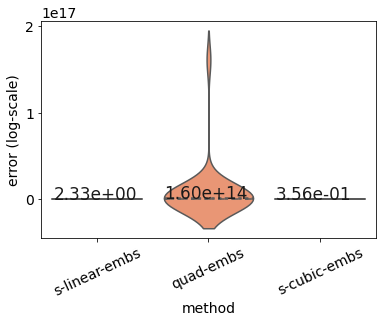

In [11]:
font = {
        'size'   : 14}

matplotlib.rc('font', **font)

ax = sns.violinplot(x ="type", y ="value", data = Errors, palette="Set2", split=True, scale="count", inner="quartile")

for l in ax.lines[1::3]:
    ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.2e}',
            size='large', color = 'k')  

sns.set(font_scale = 1.7)
ax.set_ylabel('error (log-scale)')
ax.set_xlabel('method')
plt.xticks(rotation=25, ha='center')

plt.savefig(path + f'error_analysis.png', dpi=300, transparent=False,  bbox_inches="tight", pad_inches=.2)
plt.savefig(path + f'error_analysis.pdf', transparent=False, bbox_inches="tight", pad_inches=.2)